In [333]:
import pickle 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import xgboost as xgb
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

from hyperopt import hp, fmin, tpe, Trials

import io
import os
from PIL import Image

import json

import holidays

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import gaussian_kde

<!-- ## Scraped Hourly Next-Day Energy Prices -->

<!-- ### Analysis -->

<!-- ## Scraped Hourly Energy Mix -->

<!-- ## Scraped Weather Forecast Data -->

<!-- ### Analysis -->

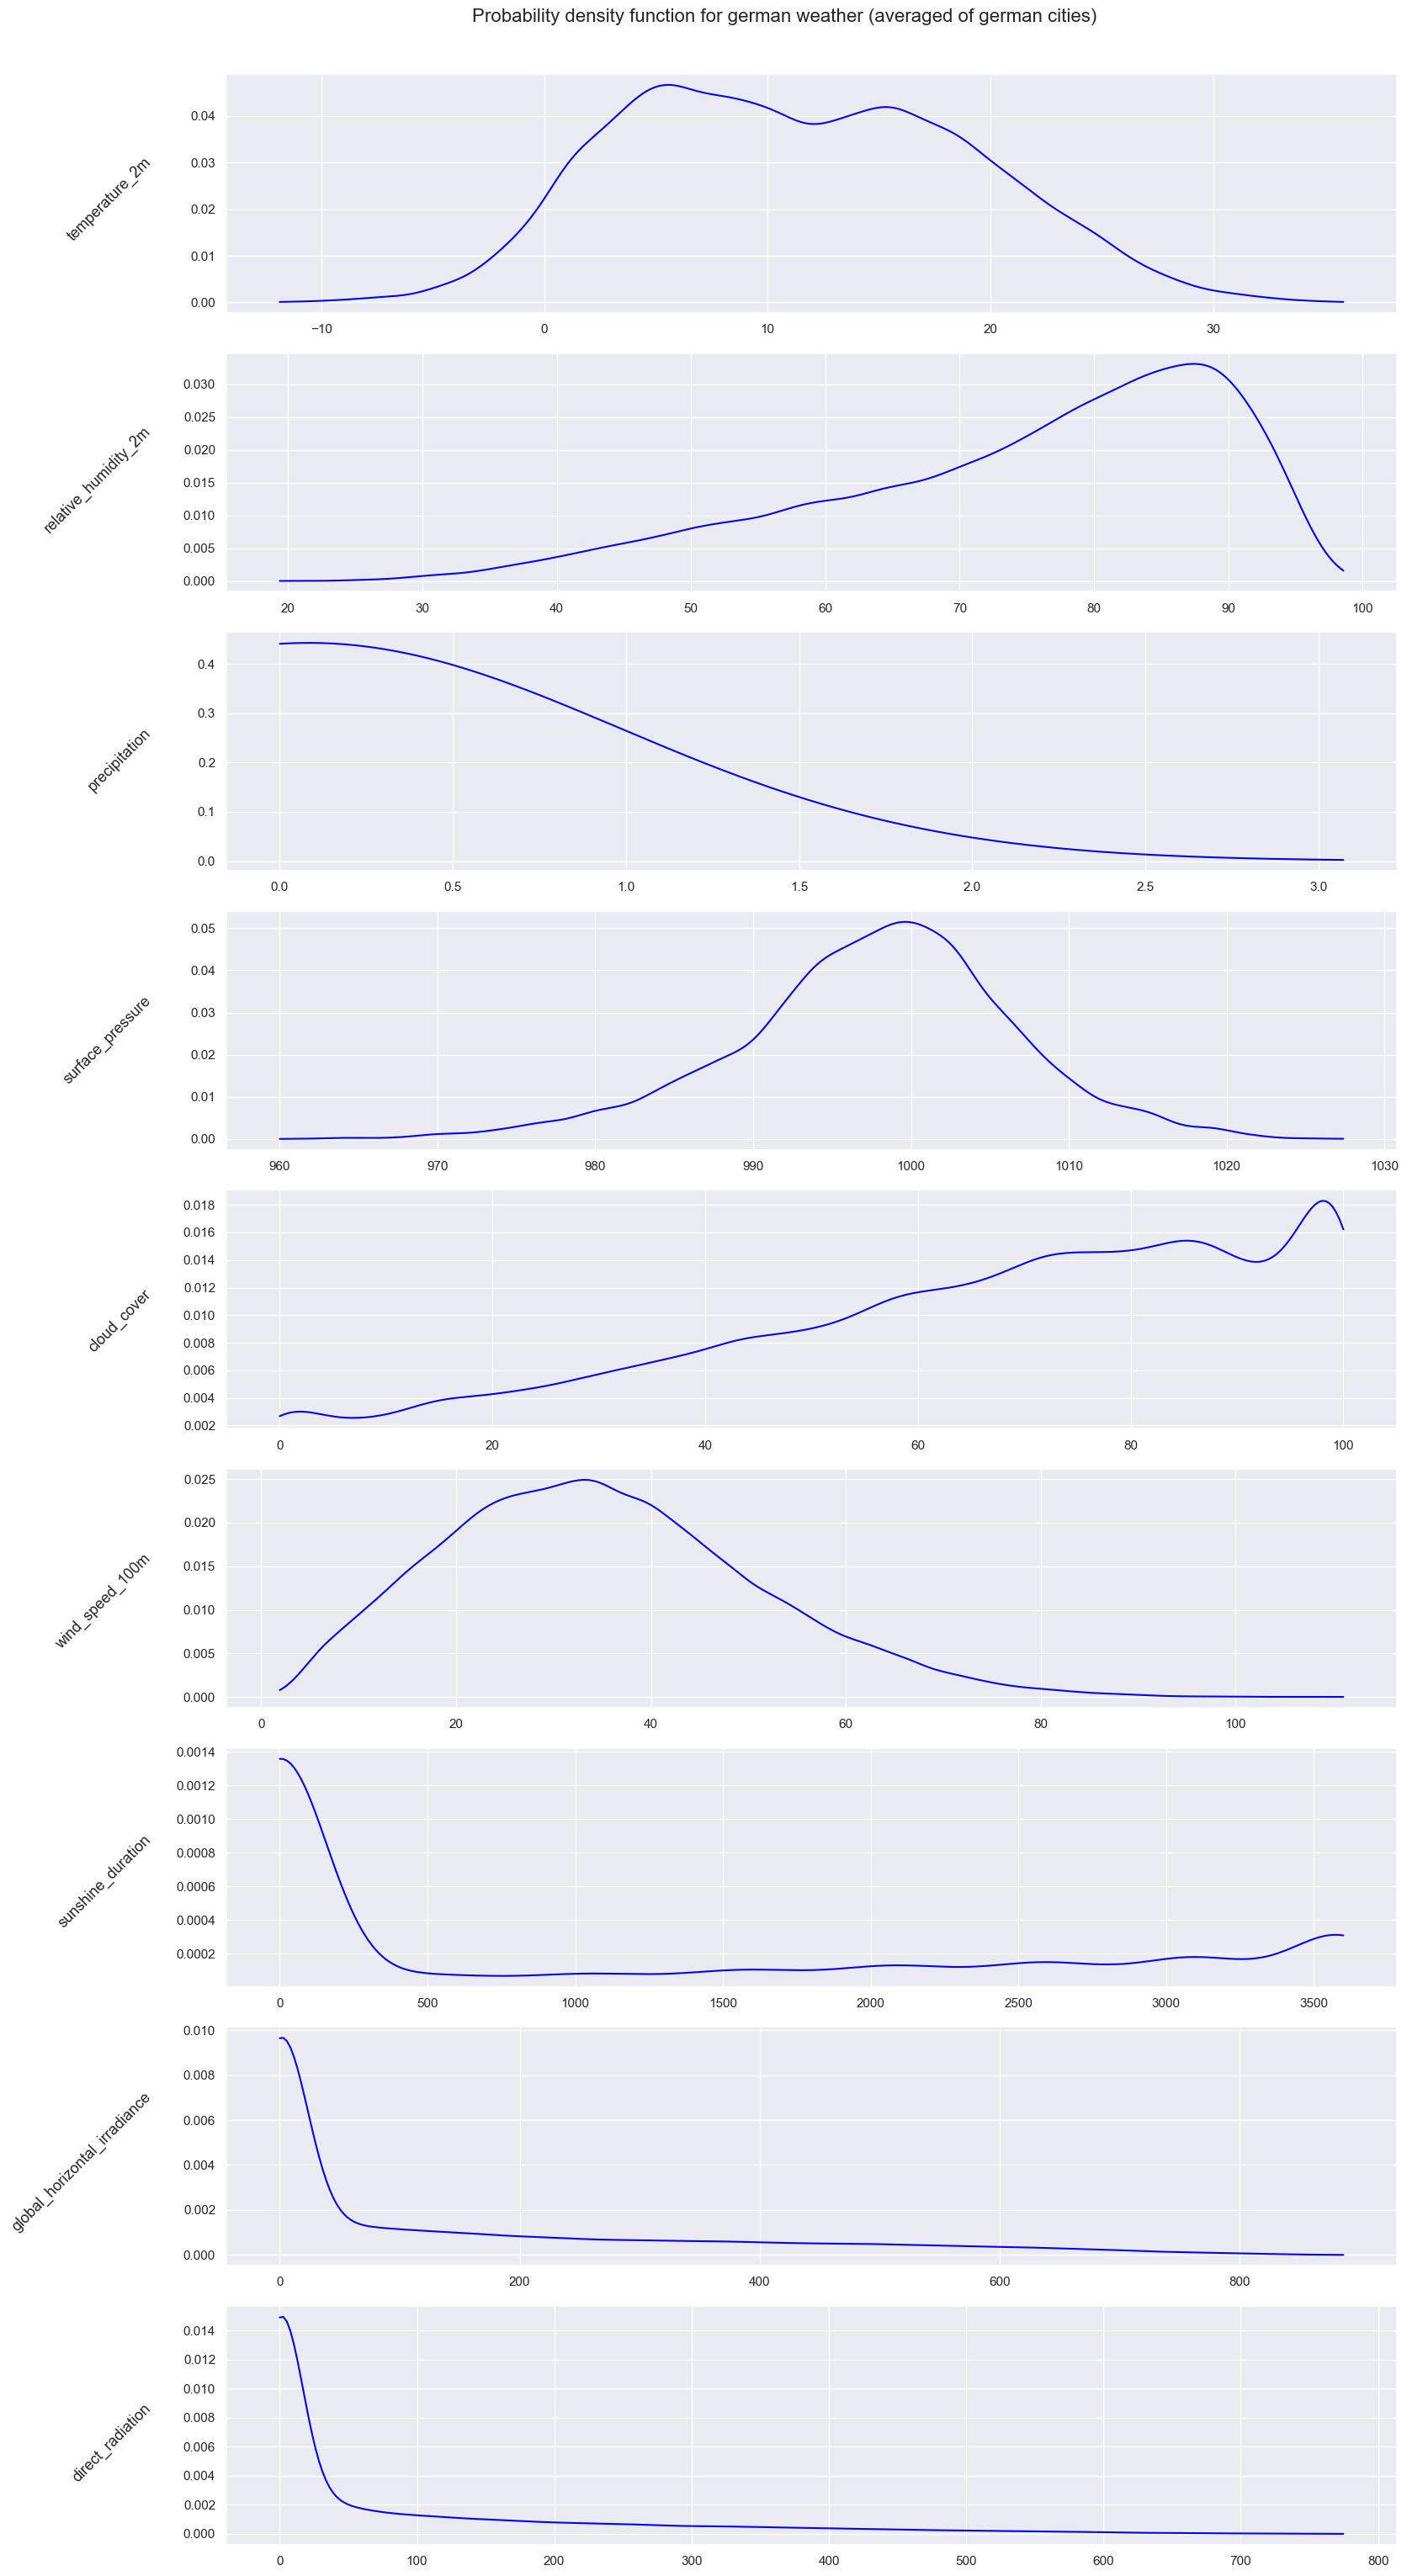

count    60408.000000
mean        11.341238
std          7.728222
min        -11.867357
25%          5.232643
50%         10.882643
75%         17.139786
max         35.818356
Name: temperature_2m, dtype: float64 

count    60408.000000
mean        74.808782
std         14.792628
min         19.379938
25%         65.294821
50%         78.295165
75%         86.615011
max         98.569940
Name: relative_humidity_2m, dtype: float64 

count    60408.000000
mean         0.093539
std          0.177210
min          0.000000
25%          0.000000
50%          0.014286
75%          0.114286
max          3.071429
Name: precipitation, dtype: float64 

count    60408.000000
mean       997.683968
std          8.810347
min        960.009770
25%        992.633150
50%        998.283550
75%       1003.252787
max       1027.392700
Name: surface_pressure, dtype: float64 

count    60408.000000
mean        65.408938
std         26.259910
min          0.000000
25%         47.714287
50%         70.142860
7

,temperature_2m,relative_humidity_2m,precipitation,surface_pressure,cloud_cover,wind_speed_100m,sunshine_duration,global_horizontal_irradiance,direct_radiation
Datetime,,,,,,,,,
2017-12-31 00:00:00,9.254071,73.660164,0.100000,983.47430,85.57143,52.056625,0.0,0.0,0.0
2017-12-31 01:00:00,9.268357,71.796160,0.042857,983.53420,85.42857,54.795845,0.0,0.0,0.0
2017-12-31 02:00:00,8.882643,71.553910,0.042857,983.91660,76.71429,61.359924,0.0,0.0,0.0
2017-12-31 03:00:00,8.911214,70.556400,0.014286,984.38430,81.85714,65.063110,0.0,0.0,0.0
2017-12-31 04:00:00,8.568357,72.516655,0.000000,984.60156,79.85714,58.501553,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2024-11-20 19:00:00,0.004071,85.576360,0.171429,974.12810,87.28571,19.196121,0.0,0.0,0.0
2024-11-20 20:00:00,-0.360214,87.778015,0.214286,974.24820,88.00000,14.000850,0.0,0.0,0.0
2024-11-20 21:00:00,-0.703071,89.357056,0.200000,974.50520,96.14286,10.822694,0.0,0.0,0.0


In [334]:
rows = 9
fig, axs = plt.subplots(rows, figsize=(15, 30))
describe = []
for i, (cols_name, data) in enumerate(ger_weather_df.items()):
    describe.append(data.describe())
    density = gaussian_kde(data, bw_method=5) if cols_name == "precipitation" else gaussian_kde(data)
    xs = np.linspace(data.min(), data.max(), 300)
    axs[i].plot(xs, density(xs), color="blue")  # Matplotlib density plot
    
    y_pos = (rows - i - 0.5) / rows
    fig.text(0.0, y_pos, cols_name, ha='right', va='center', rotation=45, fontsize=13)

fig.tight_layout()
fig.suptitle("Probability density function for german weather (averaged of german cities)", fontsize=16, y=1.02)

plt.show()
for i in describe:
    print(i, "\n")

ger_weather_df

<!-- ## Scraped Actual Weather Data -->

<!-- ## Merged Data -->

<!-- ## Standardization -->

In [335]:
def standardize_data(merged_df, e_price_df):
    scaler = StandardScaler() #z-transformation
    z_merged_df = pd.DataFrame(
        scaler.fit_transform(merged_df.copy()),
        columns=merged_df.columns,
        index=merged_df.index,
    )

    actual_price_scaler = StandardScaler() #z-transformation
    z_actual_price_df = pd.DataFrame(
        actual_price_scaler.fit_transform(e_price_df.copy()),
        columns=e_price_df.columns,
        index=e_price_df.index,
    )

    return z_merged_df, z_actual_price_df, actual_price_scaler


def unstandardized_actual_price(z_y_test, z_y_pred_e, actual_price_scaler):
        y_test = actual_price_scaler.inverse_transform([z_y_test]).flatten()
        y_predicted = actual_price_scaler.inverse_transform([z_y_pred_e]).flatten()

        return y_test, y_predicted

<!-- ## Test/Evaluation/Train Set Split -->

In [336]:
def split(DATASET, TEST_SIZE=0.16, VAL_SIZE=0.02, predict_last_day=False):
    """
    Split time series data into train, eval, and test sets, ensuring:
    - Train set includes t0.
    - Test set includes tn.
    - Eval set is positioned between train and test sets.
    
    Parameters:
    - DATASET: Pandas DataFrame or Series, indexed by datetime.
    - TEST_SIZE: Proportion of the dataset to use for the test set (default: 0.16).
    - VAL_SIZE: Proportion of the dataset to use for the eval set (default: 0.02).
    - predict_last_day: If True, use the last 24 hours as the test set.
    
    Returns:
    - train: Training set
    - eval: Evaluation set
    - test: Test set
    - SPLIT_DATE_EVAL: Date where train and eval split occurs
    - SPLIT_DATE_TEST: Date where eval and test split occurs
    """
    n = len(DATASET)
    
    if predict_last_day:
        # Use last 24 hours as test set
        test_size = 24
        train_size = n - test_size
        eval_size = int(VAL_SIZE * train_size)
        
        SPLIT_DATE_EVAL = DATASET.index[train_size - eval_size]
        SPLIT_DATE_TEST = DATASET.index[-24]
        
        train = DATASET.iloc[:train_size - eval_size]
        eval = DATASET.iloc[train_size - eval_size:train_size]
        test = DATASET.iloc[-24:]
    
    else:
        # Calculate train, eval, and test sizes based on proportions
        train_size = int((1 - TEST_SIZE - VAL_SIZE) * n)
        eval_size = int(VAL_SIZE * n)
        test_size = n - train_size - eval_size
        
        SPLIT_DATE_EVAL = DATASET.index[train_size]
        SPLIT_DATE_TEST = DATASET.index[train_size + eval_size]
        
        train = DATASET.iloc[:train_size]
        eval = DATASET.iloc[train_size:train_size + eval_size]
        test = DATASET.iloc[train_size + eval_size:]
    
    return train, eval, test, SPLIT_DATE_EVAL, SPLIT_DATE_TEST


In [337]:
def plot_generic_boxplots(features_df, features, target='Price', rounding_at=366, max_ticks=60):
    """
    Plots boxplots for different types of data, adjusting rounding dynamically to prevent overcrowding.

    Parameters:
    - features_df: DataFrame containing the features and target.
    - features: List of feature names to plot against the target.
    - target: Name of the target column (default is 'Price').
    - max_ticks: Maximum number of x-ticks allowed before reducing them.
    """
    num_features = len(features)
    fig, axs = plt.subplots(num_features, 1, figsize=(20, num_features * 6))

    for i, feat in enumerate(features):
        df = features_df.copy()

        unique_count = df[feat].nunique()
        rounding_factor = None
        rounding_text = "(No rounding)"

        if unique_count > rounding_at :
             # Calculate range (delta) of the feature
            delta = df[feat].max() - df[feat].min()

            # Determine rounding factor dynamically based on the range
            if delta > 1000:
                rounding_factor = -2  # Round to nearest 100
            elif delta > 100:
                rounding_factor = -1  # Round to nearest 10
            elif delta > 10:
                rounding_factor = 0   # Round to nearest integer
            elif delta > 1:
                rounding_factor = 1   # Round to 1 decimal place
            else:
                rounding_factor = 2   # Round to 2 decimal places

            # Apply rounding
            df[feat] = df[feat].round(rounding_factor)

            rounding_text =  f"(Rounded to nearest {10**-rounding_factor})"
        elif feat == "precipitation":
            rounding_factor = 2
            df[feat] = df[feat].round(rounding_factor)
        # Plot boxplot
        sns.boxplot(ax=axs[i], data=df, x=feat, y=target, flierprops={"marker": "x", "markersize": 2})

        # Adjust x-tick labels if they exceed max_ticks
        num_ticks = len(axs[i].get_xticks())
        if num_ticks > max_ticks:
            axs[i].set_xticks(axs[i].get_xticks()[::num_ticks // max_ticks])
        axs[i].tick_params(axis='x', rotation=45)
        axs[i].set_title(f'{target} by {feat} {rounding_text}')

    fig.tight_layout()
    plt.show()


<!-- ## Feature Selection -->

In [339]:
def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week

    german_holidays = holidays.Germany(years=[2018,2019,2020,2021,2022,2023,2024,2025])
    df['is_public_holiday'] = df.index.to_series().apply(lambda date: int(date in german_holidays))

    for window in [3, 6, 12]: # hours
        df[f'ma_{int(window)}_hours'] = df['Price'].rolling(window=window).mean()
        df[f'biomass_ma_{int(window)}_hours'] = df['Biomass'].rolling(window=window).mean()
        df[f'pumped_storage_generation_ma_{int(window)}_hours'] = df['Pumped storage generation'].rolling(window=window).mean()
        df[f'hard_coal_ma_{int(window)}_hours'] = df['Hard Coal'].rolling(window=window).mean()
        df[f'lignite_ma_{int(window)}_hours'] = df["Lignite"].rolling(window=window).mean()
        df[f'natural_gas_ma_{int(window)}_hours'] = df["Natural Gas"].rolling(window=window).mean()
        df[f'nuclear_ma_{int(window)}_hours'] = df["Nuclear"].rolling(window=window).mean()
        df[f'other_ma_{int(window)}_hours'] = df[ "Other"].rolling(window=window).mean()
        df[f'solar_ma_{int(window)}_hours'] = df['Solar'].rolling(window=window).mean()
        df[f'wind_offshore_ma_{int(window)}_hours'] = df["Wind offshore"].rolling(window=window).mean()
        df[f'wind_onshore_ma_{int(window)}_hours'] = df["Wind onshore"].rolling(window=window).mean()
    
    for window in [24, 72, 168]:  # 1 day 3 days, and 1 week
        df[f'ma_{int(window / 24)}_days'] = df['Price'].rolling(window=window).mean()
        df[f'biomass_ma_{int(window / 24)}_days'] = df['Biomass'].rolling(window=window).mean()
        df[f'pumped_storage_generation_ma_{int(window / 24)}_days'] = df['Pumped storage generation'].rolling(window=window).mean()
        df[f'hard_coal_ma_{int(window / 24)}_days'] = df['Hard Coal'].rolling(window=window).mean()

    return df

In [340]:
def feature_importance(reg, objective):
    sns.set()
    fig, axs = plt.subplots(nrows=2, figsize=(15, 10))

    idx = np.argsort(reg.feature_importances_)[::-1]
    fi_sorted = reg.feature_importances_[idx]
    fn_sorted = reg.feature_names_in_[idx]
    idx_limited = np.argsort(reg.feature_importances_)[::-1][1:]
    fi_sorted_limited = reg.feature_importances_[idx_limited]
    fn_sorted_limited = reg.feature_names_in_[idx_limited]

    fi = pd.DataFrame(data=fi_sorted,
                index=fn_sorted,
                columns=['importance'], )
    fi.sort_values('importance').plot(ax=axs[0], kind='barh', title=f'Feature Importance - {objective}')
    fi = pd.DataFrame(data=fi_sorted_limited,
                index=fn_sorted_limited,
                columns=['importance'], )
    fi.sort_values('importance').plot(ax=axs[1], kind='barh', title=f'Feature Importance ex ma_3_hours - {objective}')
    plt.tight_layout()
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    plt.show()
    plt.close()
    buf.seek(0)

    return Image.open(buf)

In [341]:
def predict_return_mse(best_params, X_train, y_train, X_val, y_val, X_test):
    reg = xgb.XGBRegressor(**best_params)
    reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=25)
    y_predicted = reg.predict(X_test)
    
    fi_img = feature_importance(reg, "MSE")

    return y_predicted, reg, fi_img

def predict_return_mae(best_params, X_train, y_train, X_val, y_val, X_test):
    best_params.update({"objective": "reg:squarederror", "eval_metric": "mae"})

    reg = xgb.XGBRegressor(**best_params)
    reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=25)
    y_predicted = reg.predict(X_test)

    fi_img = feature_importance(reg, "MAE")

    return y_predicted, reg, fi_img


## Linear Regression

In [342]:
def linear_regression(X_train, y_train, X_test, y_test):
    merged = pd.concat([X_train, y_train], axis=1)
    merged_cleaned = merged.dropna()

    X_train_cleaned = merged_cleaned.iloc[:, :-1]
    y_train_cleaned = merged_cleaned.iloc[:, -1]

    merged = pd.concat([X_test, y_test], axis=1)
    merged_cleaned = merged.dropna()

    X_test_cleaned = merged_cleaned.iloc[:, :-1]
    y_test_cleaned = merged_cleaned.iloc[:, -1]


    #Fit the model
    model = LinearRegression()
    model.fit(X_train_cleaned, y_train_cleaned)

    predictions = model.predict(X_test_cleaned)

    # Plot actual vs predicted
    plt.figure(figsize=(50, 6))
    plt.plot(X_test_cleaned.index, y_test_cleaned, color='blue', label='Actual Data')
    plt.plot(X_test_cleaned.index, predictions, color='red', linewidth=2, label='Regression Line')
    plt.xlabel('Index')
    plt.ylabel('Target Variable')
    plt.title('Regression Line vs Actual Data')
    plt.legend()
    plt.show()

    rmse = mean_squared_error(y_test_cleaned, predictions) ** 0.5
    r2 = r2_score(y_test_cleaned, predictions)

    print(f"Root Mean Squared Error: {rmse}")
    print(f"R-squared: {r2}")

## Auto ML

In [343]:
default_params = {
    "base_score": 0.380924762889507,
    "early_stopping_rounds": 13,
    "max_depth": 40,
    "learning_rate": 0.06,
    "n_estimators": 140,
    "gamma": 0.9,
    "min_child_weight": 6,
    "subsample": 0.5719023844219375,
    "colsample_bytree": 0.8815691043681952,
}

In [344]:
def model_fit_and_predict(params, X_train, y_train, X_val, y_val, X_test, y_test):
    reg = xgb.XGBRegressor(**params)

    reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=None)
    pred = reg.predict(X_test)
    score = root_mean_squared_error(y_test, pred)
    return score

def objective(search_space):

    params = {
        "base_score":search_space.get("base_score", default_params["base_score"]),
        "early_stopping_rounds":search_space.get("early_stopping_rounds", default_params["early_stopping_rounds"]), 
        "max_depth":search_space.get("max_depth", default_params["max_depth"]),
        "learning_rate":search_space.get("learning_rate", default_params["learning_rate"]),
        "n_estimators":search_space.get("n_estimators", default_params["n_estimators"]),
        "gamma":search_space.get("gamma", default_params["gamma"]),
        "min_child_weight":search_space.get("min_child_weight", default_params["min_child_weight"]),
        "subsample":search_space.get("learning_rate", default_params["learning_rate"]),
        "colsample_bytree":search_space.get("colsample_bytree", default_params["colsample_bytree"]),
        "colsample_bynode":search_space.get("colsample_bynode", default_params["colsample_bynode"]),
        "colsample_bylevel":search_space.get("colsample_bylevel", default_params["colsample_bylevel"]),
        "reg_lambda":search_space.get("learning_rate", default_params["learning_rate"]),
    }

    rmse = model_fit_and_predict(params)
    
    return rmse

In [345]:
search = False

search_space = {
    # "base_score": hp.uniform("base_score", 0.38, 0.381),
    # "early_stopping_rounds": hp.choice("early_stopping_rounds", np.arange(3, 300, 1, dtype=int)),
    "max_depth": hp.choice("max_depth", np.arange(30, 50, 1, dtype=int)),
    # "learning_rate": hp.uniform("learning_rate", 0.025, 0.035),
    # "gamma": hp.uniform("gamma", 0.9, 0.9059588489958413),
    # "reg_lambda": hp.uniform("reg_lambda", 0.98, 1),
    # "colsample_bytree": hp.uniform("colsample_bytree", 0.85, 0.90),
    # "n_estimators": hp.choice("n_estimators", np.arange(100, 1000, 10, dtype="int")),
    # "min_child_weight": hp.choice("min_child_weight", np.arange(1, 10, 1, dtype="int")),
    # "subsample": hp.uniform("subsample", 0.5712784309398466, 0.572),
}

# Keeping track of the optimization history
trials = Trials()
best_search = {}
if search:

    # Run the Hyperopt optimization
    best_search = fmin(
        fn=objective, 
        space=search_space, 
        algo=tpe.suggest,
        max_evals=20, 
        trials=trials
    )

    score = model_fit_and_predict(best_search)
    print(f'RMSE Score on Test set: {score:.2f}\n')

# print(f"base_score: {best_search.get("base_score", f"{default_params["base_score"]} (user default)")}, model default: 0.5")
# print(f"early_stopping_rounds: {best_search.get("early_stopping_rounds", f"{default_params["early_stopping_rounds"]} (user default)")}, model default: 10")
# print(f"max_depth: {best_search.get("max_depth", f"{default_params["max_depth"]} (user default)")}, model default: 6")
# print(f"learning_rate: {best_search.get("learning_rate", f"{default_params["learning_rate"]} (user default)")}, model default: 0.3")
# print(f"n_estimators: {best_search.get("n_estimators", f"{default_params["n_estimators"]} (user default)")}, model default: 100")
# print(f"gamma: {best_search.get("gamma", f"{default_params["gamma"]} (user default)")}, model default: 0")
# print(f"min_child_weight: {best_search.get("min_child_weight", f"{default_params["min_child_weight"]} (user default)")}, model default: 1")
# print(f"subsample: {best_search.get("subsample", f"{default_params["subsample"]} (user default)")}, model default: 1")
# print(f"colsample_bytree: {best_search.get("colsample_bytree", f"{default_params["colsample_bytree"]} (user default)")}, model default: 1")

In [346]:
def plot_predicted(test_set, predictions):
    fig, axs = plt.subplots(nrows=2, figsize=(15, 10))

    axs[0].plot(test_set.index, test_set["Price"],  alpha=0.6)
    axs[0].plot(test_set.index, predictions,  alpha=0.6)
    axs[0].set_xlim(test_set.index.min(), test_set.index.max())
    axs[0].set_ylabel("Hourly Next-Day Energy Price")
    plt.legend(['Actual Data', 'Model Predictions'])    
    axs[0].set_title(f'Test Data vs. Predictions (Full) - {objective[-3:]}')

    test_set = test["2024-10-28 22:00:00":].copy()
    axs[1].plot(test_set.index, test_set["Price"],  alpha=0.6)
    axs[1].plot(test_set.index, predictions,  alpha=0.4)
    axs[1].set_xlim(test_set.index.min(), test_set.index.max())
    axs[1].set_ylabel("Hourly Next-Day Energy Price")
    plt.legend(['Actual Data', 'Model Predictions'])    
    axs[1].set_title(f'Test Data vs. Predictions (29-10-2024) - {objective[-3:]}')




## Data Collection

In [347]:
dfs_to_merge = []

In [348]:
e_price_df = pd.read_csv('../../data/day_ahead_energy_prices.csv', delimiter=",")
e_price_df = e_price_df.set_index('Datetime')
e_price_df.index = pd.to_datetime(e_price_df.index)

e_price_df.rename(columns={"hourly day-ahead energy price": "Price"}, inplace=True)
dfs_to_merge.append(e_price_df)

              Price
count  53850.000000
mean      93.738508
std       97.655427
min     -500.000000
25%       36.710000
50%       63.245000
75%      111.545000
max      871.000000


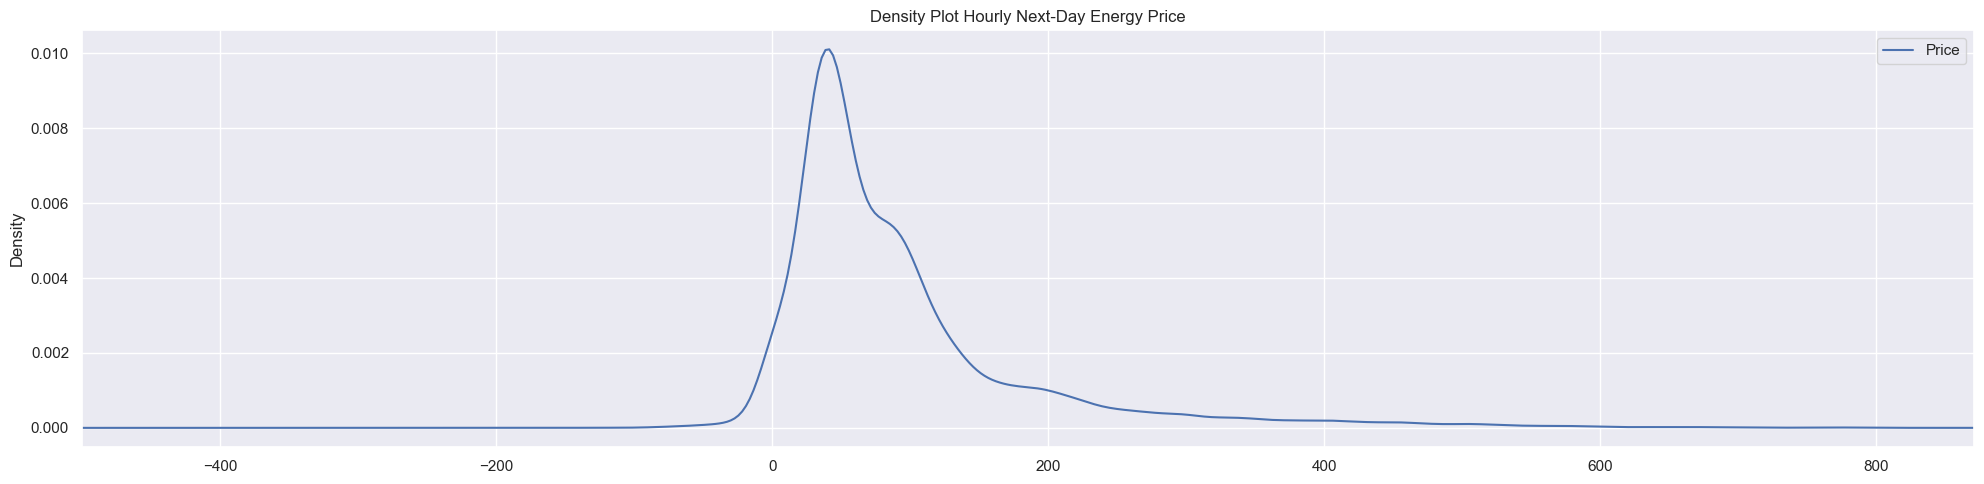

,Price
Datetime,
2018-10-01 00:00:00,59.53
2018-10-01 01:00:00,56.10
2018-10-01 02:00:00,51.41
2018-10-01 03:00:00,47.38
2018-10-01 04:00:00,47.59
...,...
2024-11-21 19:00:00,154.05
2024-11-21 20:00:00,131.33
2024-11-21 21:00:00,123.05


In [349]:
fig, ax = plt.subplots(figsize=(20, 5))
e_price_sorted = e_price_df.sort_values(by="Price", ignore_index=True).copy()

print(e_price_sorted.describe())

e_price_sorted.plot( ax = ax, kind = "density")
ax.set_xlim(-500, 871)
ax.set_ylabel("y")

ax.set_ylabel("Density")
ax.set_title("Density Plot Hourly Next-Day Energy Price")
fig.tight_layout()
plt.show()
e_price_df

In [350]:
ger_weather_df = pd.read_csv("../../data/germany_weather_average.csv")
ger_weather_df.set_index("date" ,inplace=True)
ger_weather_df.index = pd.to_datetime(ger_weather_df.index)
ger_weather_df.index = ger_weather_df.index.tz_localize(None)
ger_weather_df.rename_axis("Datetime",inplace=True)
ger_weather_df.index = ger_weather_df.index - pd.Timedelta(hours=24)

ger_weather_df.rename(columns={
    "Precipitation (rain/snow)": "precipitation", "Global Horizontal Irradiance": "global_horizontal_irradiance"
}, inplace=True)

dfs_to_merge.append(ger_weather_df)

In [351]:
mix_df = pd.read_csv('../../data/hourly_market_mix_cleaned.csv', delimiter=",")
mix_df.set_index("Timestamp", inplace=True)
mix_df.index = pd.to_datetime(mix_df.index)
mix_df.rename_axis("Datetime", inplace=True) 
mix_df = mix_df.loc[:, mix_df.max() >= 0.01]
dfs_to_merge.append(mix_df)


In [352]:
merged_df = pd.concat(dfs_to_merge, axis=1, join='inner')
merged_df

,Price,temperature_2m,relative_humidity_2m,precipitation,surface_pressure,cloud_cover,wind_speed_100m,sunshine_duration,global_horizontal_irradiance,direct_radiation,...,Hard Coal,Hydro,Lignite,Natural Gas,Nuclear,Other,Pumped storage generation,Solar,Wind offshore,Wind onshore
Datetime,,,,,,,,,,,,,,,,,,,,,
2018-10-01 00:00:00,59.53,6.882643,85.721290,0.014286,1001.64010,35.000000,36.417800,0.0,0.0,0.0,...,0.148649,0.020898,0.284357,0.155871,0.142107,0.041383,0.003477,0.0,0.029572,0.078357
2018-10-01 01:00:00,56.10,6.525500,86.924644,0.028571,1001.64290,46.714287,36.784780,0.0,0.0,0.0,...,0.142985,0.020278,0.285558,0.157544,0.142376,0.041972,0.003478,0.0,0.037920,0.073151
2018-10-01 02:00:00,51.41,6.204071,87.565780,0.014286,1001.47550,58.428570,41.465073,0.0,0.0,0.0,...,0.139489,0.020001,0.286402,0.161350,0.142441,0.041791,0.003471,0.0,0.038929,0.071471
2018-10-01 03:00:00,47.38,6.125500,88.048180,0.157143,1001.51200,62.428570,44.546220,0.0,0.0,0.0,...,0.146157,0.020071,0.286085,0.153114,0.140053,0.041441,0.003452,0.0,0.039751,0.075943
2018-10-01 04:00:00,47.59,6.139786,87.982620,0.000000,1001.49910,66.142860,50.177677,0.0,0.0,0.0,...,0.148990,0.019701,0.282126,0.146368,0.138012,0.040888,0.003391,0.0,0.045451,0.082545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-29 20:00:00,140.60,11.011214,94.399124,0.000000,1009.16350,97.428570,18.960790,0.0,0.0,0.0,...,0.142999,0.047220,0.253702,0.278486,0.000000,0.044794,0.014459,0.0,0.027928,0.097331
2024-10-29 21:00:00,124.05,11.032643,95.002700,0.000000,1009.24896,94.000000,20.744114,0.0,0.0,0.0,...,0.150384,0.044436,0.265195,0.268427,0.000000,0.046835,0.002805,0.0,0.030024,0.096333
2024-10-29 22:00:00,118.08,10.818357,95.514150,0.000000,1009.29395,90.571430,23.395761,0.0,0.0,0.0,...,0.150584,0.047273,0.270704,0.255679,0.000000,0.046154,0.001140,0.0,0.035149,0.097447


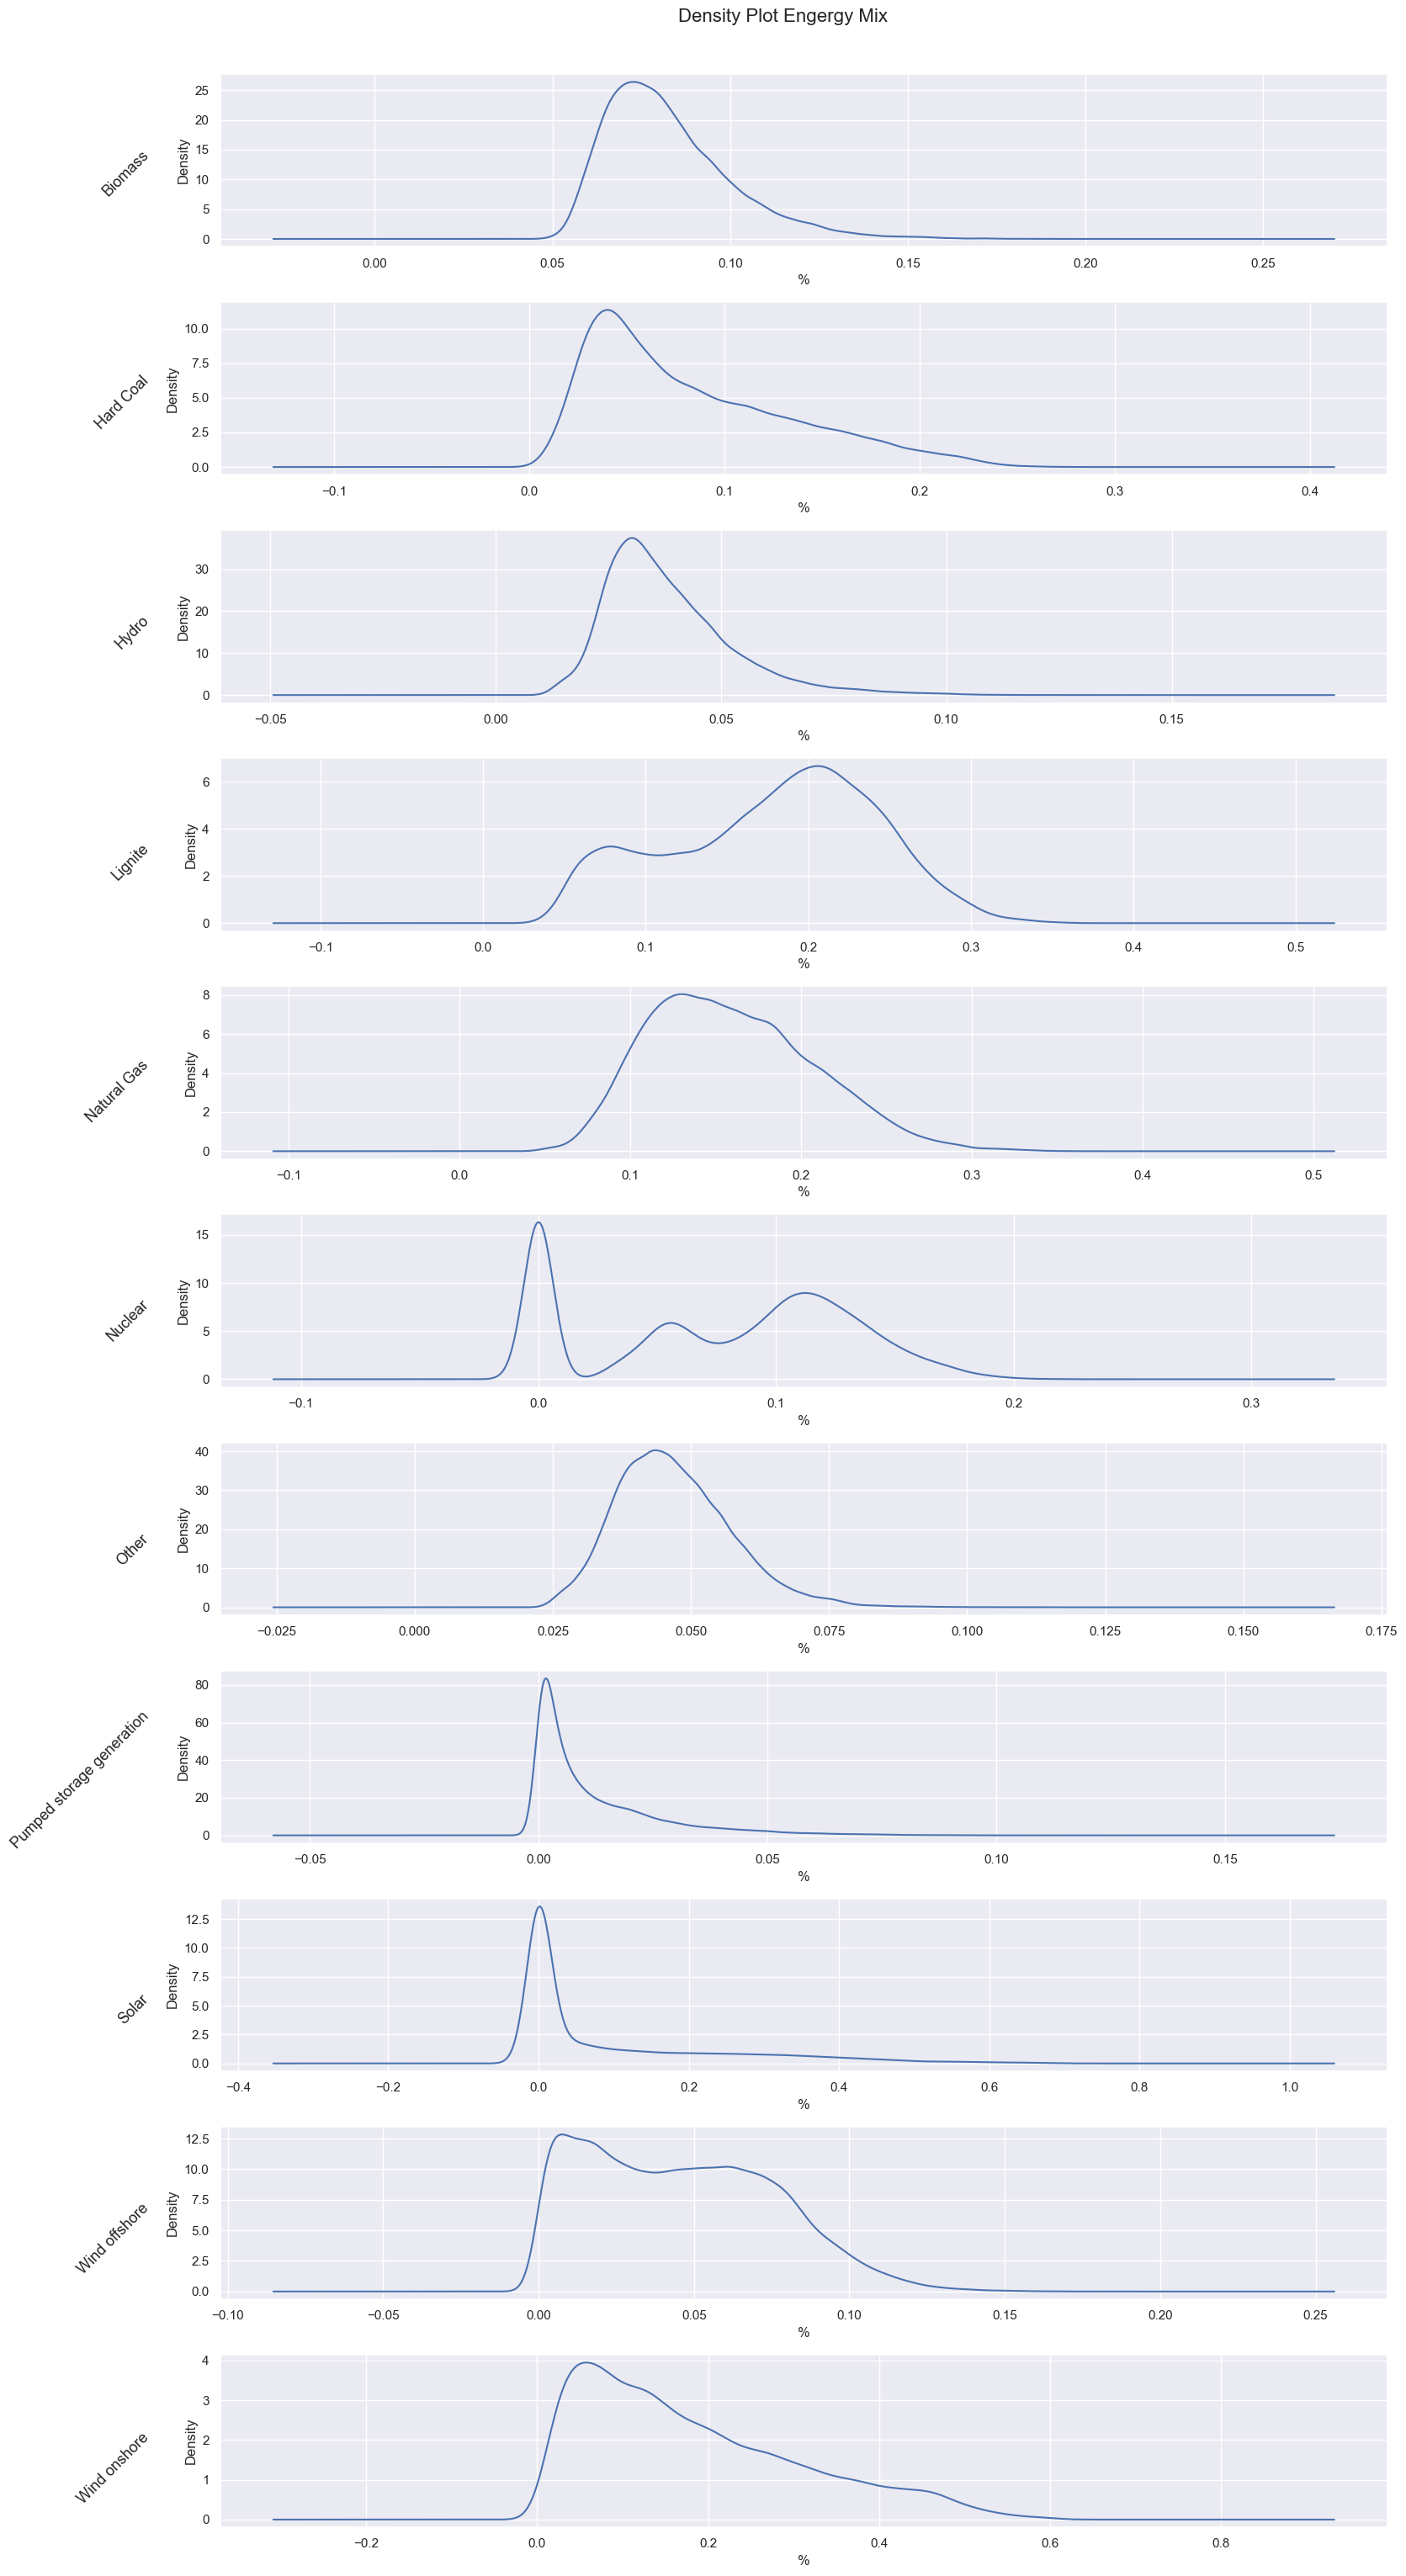

count    53161.000000
mean         0.082565
std          0.017816
min          0.046099
25%          0.069619
50%          0.079192
75%          0.091900
max          0.195352
Name: Biomass, dtype: float64 

count    53161.000000
mean         0.083275
std          0.051783
min          0.004782
25%          0.041829
50%          0.068767
75%          0.116213
max          0.276600
Name: Hard Coal, dtype: float64 

count    53161.000000
mean         0.038190
std          0.014154
min          0.009522
25%          0.028329
50%          0.035253
75%          0.045083
max          0.127235
Name: Hydro, dtype: float64 

count    53161.000000
mean         0.178598
std          0.063812
min          0.034065
25%          0.131726
50%          0.187467
75%          0.225959
max          0.360442
Name: Lignite, dtype: float64 

count    53161.000000
mean         0.159447
std          0.047908
min          0.046119
25%          0.122763
50%          0.154464
75%          0.191282
max          0

,Biomass,Hard Coal,Hydro,Lignite,Natural Gas,Nuclear,Other,Pumped storage generation,Solar,Wind offshore,Wind onshore
Datetime,,,,,,,,,,,
2018-10-01 00:00:00,0.095329,0.148649,0.020898,0.284357,0.155871,0.142107,0.041383,0.003477,0.0,0.029572,0.078357
2018-10-01 01:00:00,0.094738,0.142985,0.020278,0.285558,0.157544,0.142376,0.041972,0.003478,0.0,0.037920,0.073151
2018-10-01 02:00:00,0.094656,0.139489,0.020001,0.286402,0.161350,0.142441,0.041791,0.003471,0.0,0.038929,0.071471
2018-10-01 03:00:00,0.093932,0.146157,0.020071,0.286085,0.153114,0.140053,0.041441,0.003452,0.0,0.039751,0.075943
2018-10-01 04:00:00,0.092527,0.148990,0.019701,0.282126,0.146368,0.138012,0.040888,0.003391,0.0,0.045451,0.082545
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-29 20:00:00,0.093081,0.142999,0.047220,0.253702,0.278486,0.000000,0.044794,0.014459,0.0,0.027928,0.097331
2024-10-29 21:00:00,0.095560,0.150384,0.044436,0.265195,0.268427,0.000000,0.046835,0.002805,0.0,0.030024,0.096333
2024-10-29 22:00:00,0.095872,0.150584,0.047273,0.270704,0.255679,0.000000,0.046154,0.001140,0.0,0.035149,0.097447


In [353]:
fig, axs = plt.subplots(11, figsize=(15, 30))
rows = 11

describe = []

for i, (cols_name, data) in enumerate(mix_df.items()):

    describe.append(data.describe())

    mix_sorted = data.sort_values(ignore_index=True).copy()

    mix_sorted.plot(ax = axs[i], kind = "density")

    axs[i].set_xlabel("%")

    y_pos = (rows - i - 0.5) / rows
    fig.text(0.0, y_pos, cols_name, ha='right', va='center', rotation=45, fontsize=13)


fig.tight_layout()
fig.suptitle("Density Plot Engergy Mix", fontsize=16, y=1.02)

plt.show()
for i in describe:
    print(i, "\n")

mix_df

In [354]:
metrics_df = pd.read_csv('../../data/hourly_market_metrics_cleaned.csv', delimiter=",")
metrics_df.set_index("Timestamp", inplace=True)
metrics_df.index = pd.to_datetime(metrics_df.index)
metrics_df.rename_axis("Datetime", inplace=True) 
dfs_to_merge.append(metrics_df)
metrics_df


,Grid emission factor,Total conventional power plant,Total electricity demand,Total grid emissions
Datetime,,,,
2018-10-01 00:00:00,537.211,43.289,52.442,29973.883
2018-10-01 01:00:00,535.140,43.165,52.009,29847.622
2018-10-01 02:00:00,534.424,43.317,51.341,29873.085
2018-10-01 03:00:00,536.030,43.292,53.145,30124.960
2018-10-01 04:00:00,530.868,43.462,54.961,30367.447
...,...,...,...,...
2024-10-29 20:00:00,533.043,37.842,59.140,27465.121
2024-10-29 21:00:00,549.691,36.092,57.003,27041.454
2024-10-29 22:00:00,549.949,34.947,54.139,26536.248


## Pipeline

In [355]:
LIMIT_PRICE = True # defines an upper and lower bound for the energy price
MAX_PRICE = 500
MIN_PRICE = -400



STANDARDIZE = False # standardizes the data
LAST_DAY_TEST = True # uses only the last 24h of the dataset as test set

REMOVE_COVID = False
REMOVE_GAS_SHORTAGE = False

### Feature Selection

In [356]:
FEATURES = [
    "hour",
    "dayofyear",
    "dayofweek",

    "is_public_holiday",

    "ma_3_hours",
    "ma_6_hours",   
    "ma_1_days",
    # "ma_3_days",
    "ma_7_days",

# -- Energy Mix --
    "Biomass",
    "Hard Coal",
    "Hydro",
    "Lignite",
    "Natural Gas",
    "Nuclear",
    "Other",
    "Pumped storage generation",
    "Solar",
    "Wind offshore",
    "Wind onshore",

# --- Grid Metrics ---
    # "Grid emission factor", 
    # "Total conventional power plant", 
    # "Total electricity demand",
    # "Total grid emissions",

    # "biomass_ma_3_hours",
    # "biomass_ma_6_hours",
    # "biomass_ma_1_days",
    # "biomass_ma_3_days",
    # "biomass_ma_7_days",

    "pumped_storage_generation_ma_3_hours",
    "pumped_storage_generation_ma_6_hours",
    # "pumped_storage_generation_ma_1_days",
    # "pumped_storage_generation_ma_3_days",
    # "pumped_storage_generation_ma_7_days",
   
    # "hard_coal_ma_3_hours",
    # "hard_coal_ma_6_hours",
    # "hard_coal_ma_1_days",
    # "hard_coal_ma_3_days",
    # "hard_coal_ma_7_days",

    # "lignite_ma_3_hours",
    # "lignite_ma_6_hours",

    # "natural_gas_ma_3_hours",
    # "natural_gas_ma_6_hours",

    # "nuclear_ma_3_hours",
    # "nuclear_ma_6_hours",

    # "other_ma_3_hours",
    # "other_ma_6_hours",

    # "solar_ma_3_hours",
    # "solar_ma_6_hours",

    # "wind_offshore_ma_3_hours",
    # "wind_offshore_ma_6_hours",

    # "wind_onshore_ma_3_hours",
    # "wind_onshore_ma_6_hours",

#  -- Average Weather -- 
    "temperature_2m",
    "relative_humidity_2m",
    "precipitation",
    "surface_pressure",
    "cloud_cover",
    "wind_speed_100m",
    "sunshine_duration",
    "direct_radiation",
    "global_horizontal_irradiance"
]


In [357]:
if LIMIT_PRICE:
    merged_mask = (merged_df["Price"] > MIN_PRICE) & (merged_df["Price"] < MAX_PRICE)
    merged_df = merged_df[merged_mask]

    e_price_mask = (e_price_df["Price"] > MIN_PRICE) & (e_price_df["Price"] < MAX_PRICE)
    e_price_df = e_price_df[e_price_mask]

### Standardization

In [358]:
if STANDARDIZE:
    merged_df, z_actual_price_df, actual_price_scaler = standardize_data(merged_df, e_price_df)

In [359]:
start_date = '2022-01-01 00:00:00'
end_date = '2022-1-31 23:00:00'

merged_df = merged_df.loc[start_date:end_date]
merged_df

,Price,temperature_2m,relative_humidity_2m,precipitation,surface_pressure,cloud_cover,wind_speed_100m,sunshine_duration,global_horizontal_irradiance,direct_radiation,...,Hard Coal,Hydro,Lignite,Natural Gas,Nuclear,Other,Pumped storage generation,Solar,Wind offshore,Wind onshore
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,50.05,7.189786,90.241150,0.000000,1002.61176,99.71429,49.534920,0.0,0.0,0.0,...,0.033186,0.041295,0.067243,0.122733,0.057460,0.050677,0.004604,0.0,0.104335,0.431396
2022-01-01 01:00:00,41.33,6.854072,89.673560,0.000000,1001.98016,93.71429,48.823074,0.0,0.0,0.0,...,0.034158,0.043765,0.068567,0.123741,0.059603,0.051871,0.005214,0.0,0.103260,0.420809
2022-01-01 02:00:00,43.22,6.618357,88.845070,0.214286,1001.50140,91.85714,48.763767,0.0,0.0,0.0,...,0.034838,0.043543,0.069492,0.127213,0.061228,0.053240,0.004812,0.0,0.102016,0.411996
2022-01-01 03:00:00,45.46,6.746929,87.598630,0.271429,1000.90704,92.71429,47.776028,0.0,0.0,0.0,...,0.035607,0.044222,0.071516,0.130987,0.062807,0.054589,0.002017,0.0,0.101600,0.402462
2022-01-01 04:00:00,37.67,6.818357,87.318150,0.257143,1000.24860,99.71429,49.019830,0.0,0.0,0.0,...,0.036237,0.046632,0.073863,0.134110,0.064259,0.055754,0.001234,0.0,0.107882,0.383623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31 19:00:00,240.40,5.325500,83.125046,0.085714,989.11847,94.00000,76.477830,0.0,0.0,0.0,...,0.113032,0.025891,0.191417,0.187976,0.057027,0.047739,0.012631,0.0,0.066314,0.218553
2022-01-31 20:00:00,231.59,5.582643,83.276320,0.285714,989.27720,95.71429,77.706330,0.0,0.0,0.0,...,0.113835,0.024683,0.191079,0.184677,0.057184,0.047966,0.010212,0.0,0.077973,0.214404
2022-01-31 21:00:00,212.96,5.532643,84.203630,0.128571,989.56305,93.14286,79.086780,0.0,0.0,0.0,...,0.116337,0.024824,0.186077,0.173658,0.057167,0.047716,0.004634,0.0,0.085030,0.228039


In [360]:
features_df = create_features(merged_df)[FEATURES]

TARGET = merged_df["Price"]
combined_df=pd.concat([features_df, TARGET], axis=1)

train, eval, test, SPLIT_DATE_EVAL, SPLIT_DATE_TEST = split(combined_df, predict_last_day=LAST_DAY_TEST)

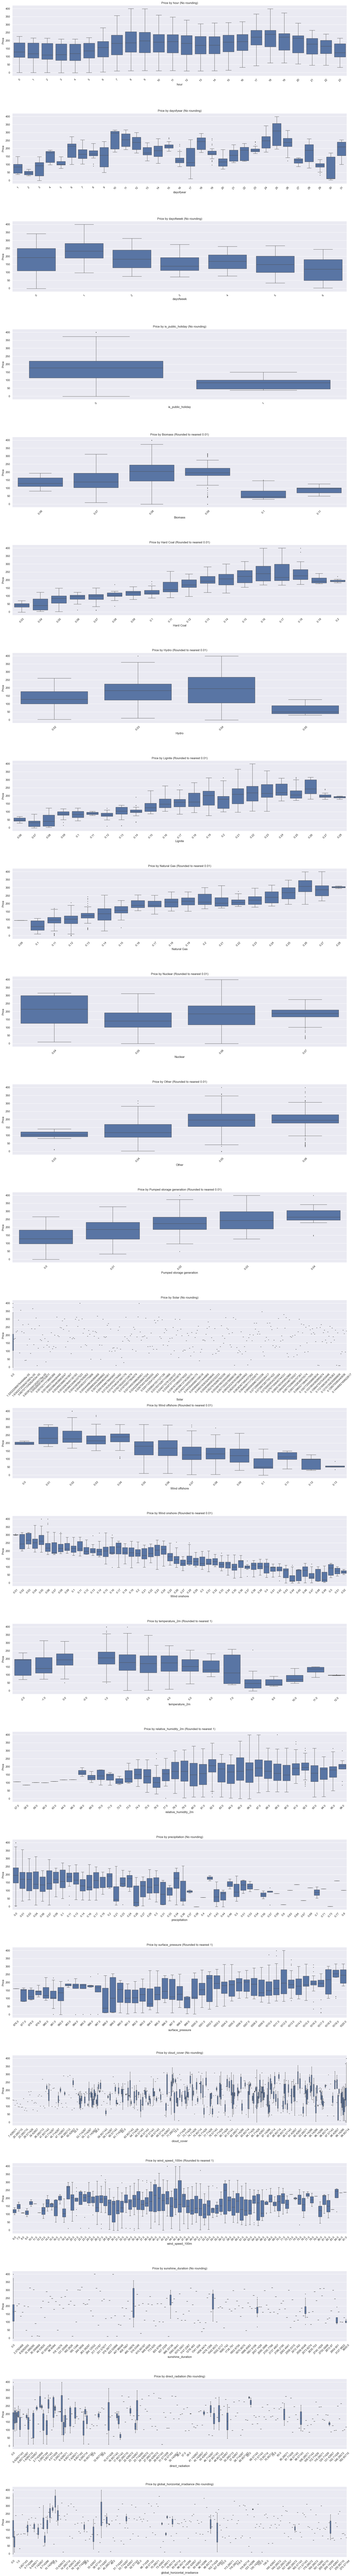

In [361]:
plt_features = [feat for feat in FEATURES if "ma_" not in feat]
plot_generic_boxplots(combined_df, plt_features)

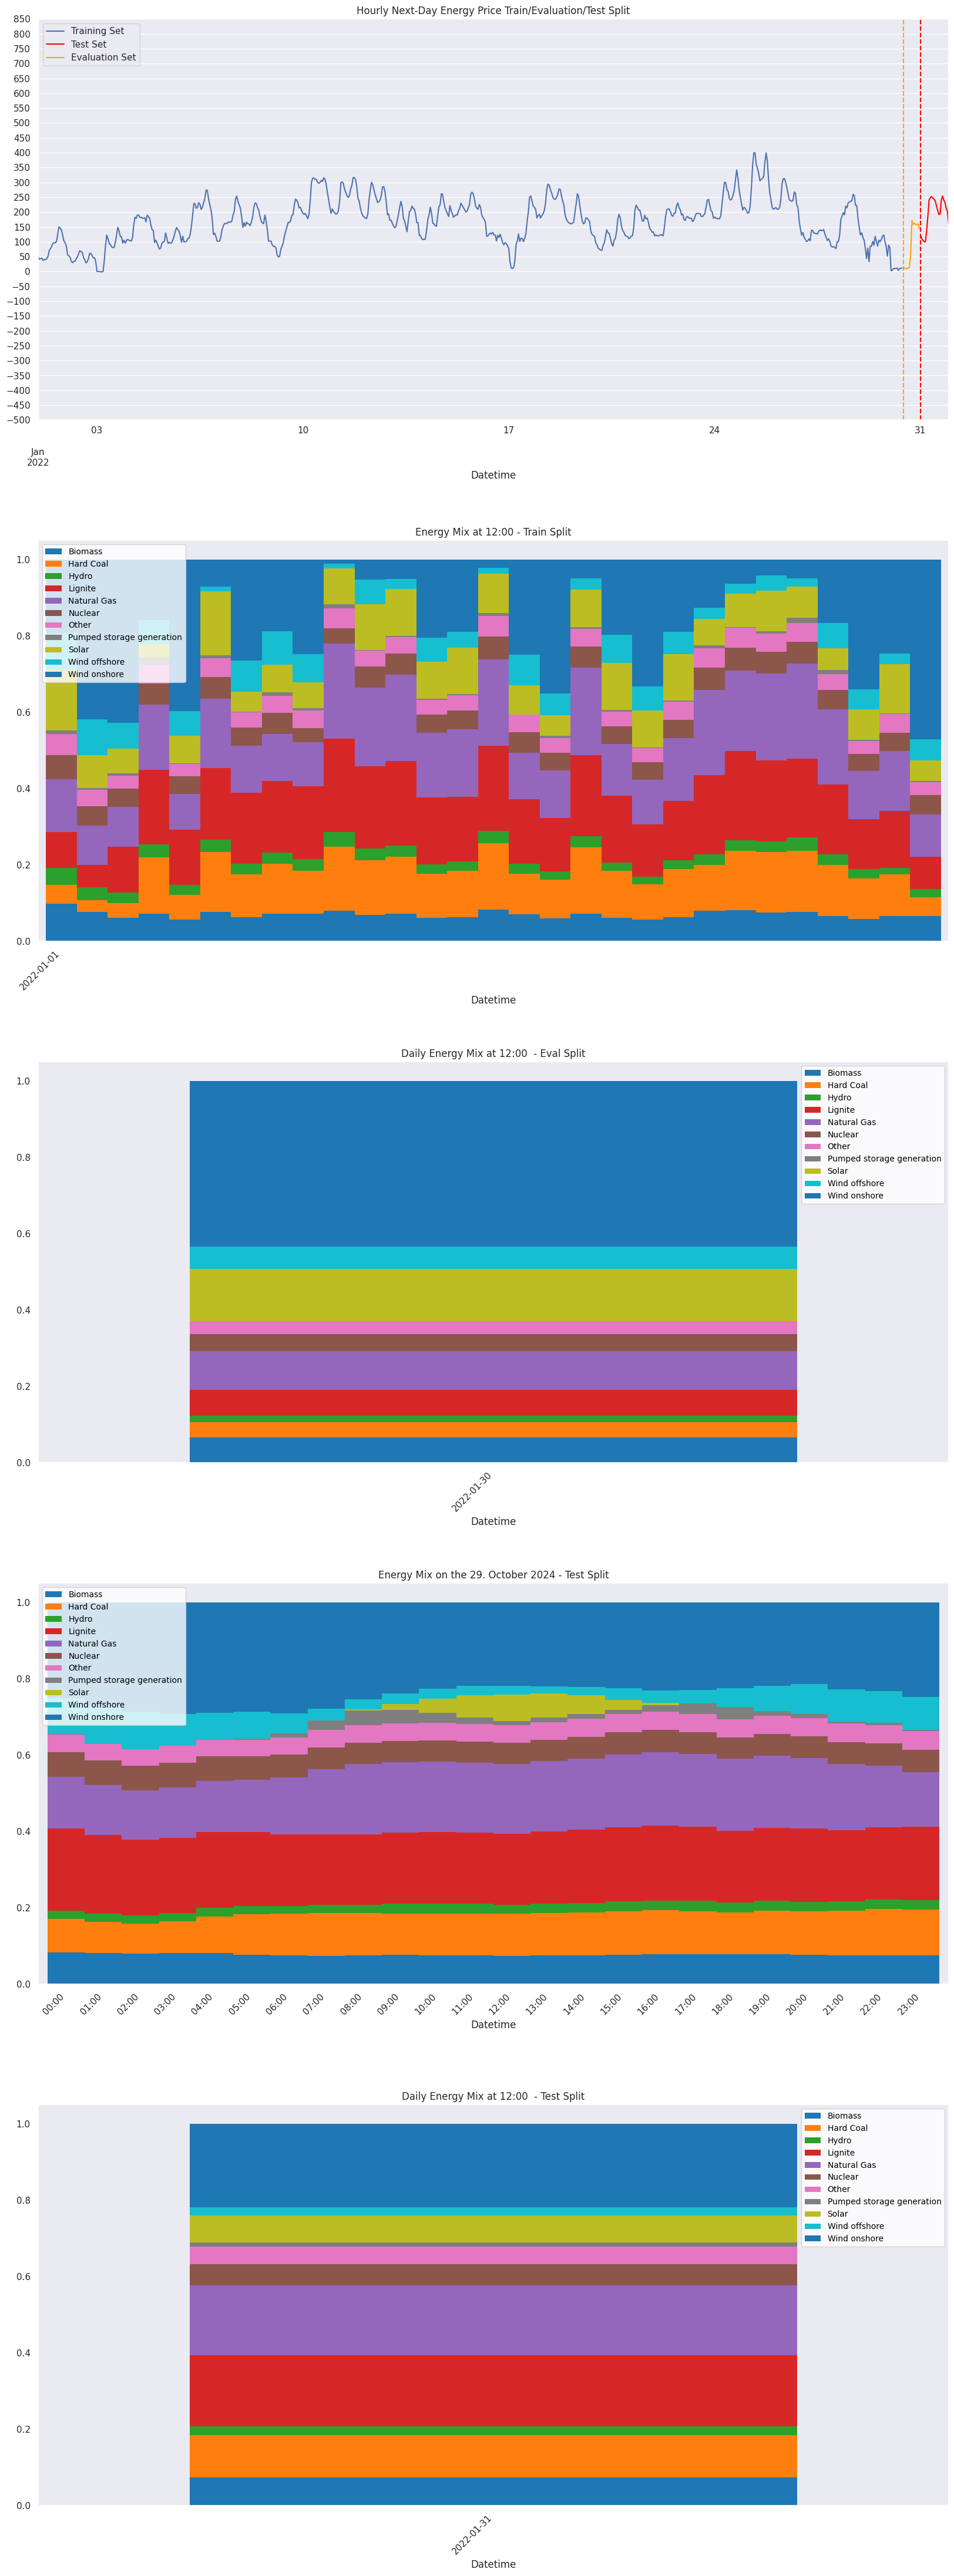

In [362]:
plot_merged_datasets(train, eval, test, SPLIT_DATE_EVAL, SPLIT_DATE_TEST)

In [363]:
TARGET = "Price"

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

X_val = eval[FEATURES]
y_val = eval[TARGET]

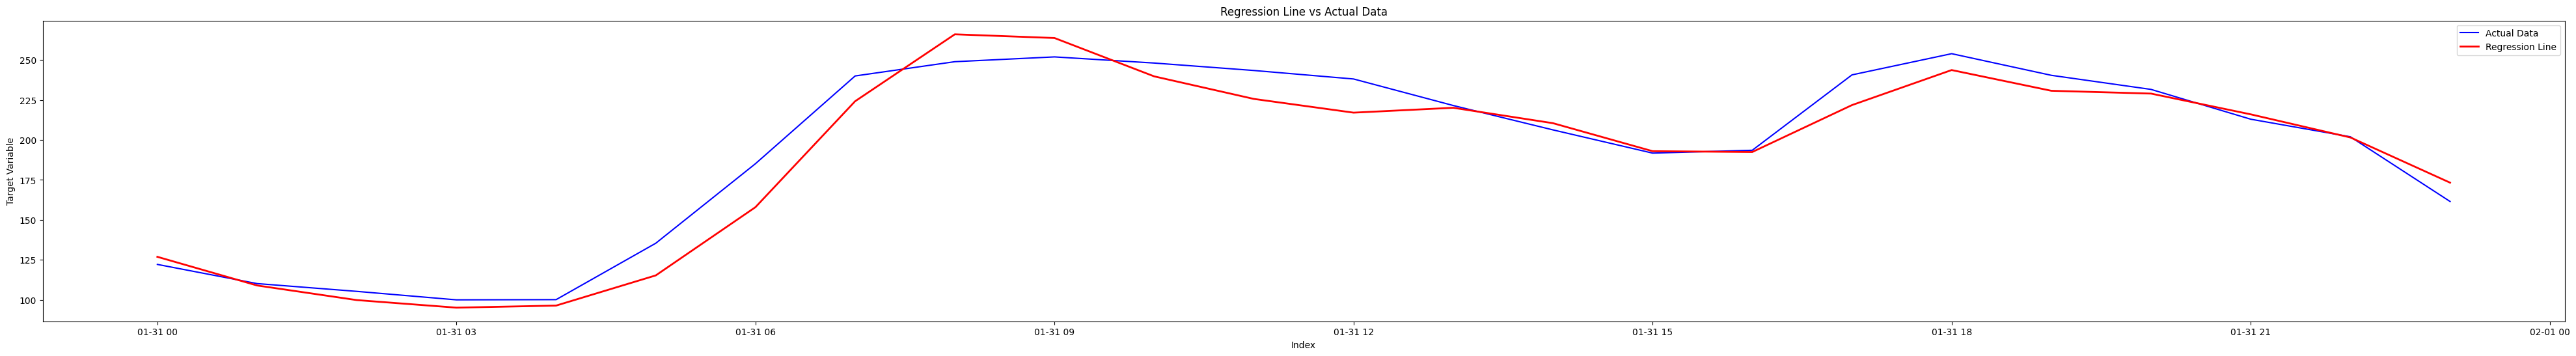

Root Mean Squared Error: 12.038761537938225
R-squared: 0.9493751573396646


In [364]:
linear_regression(X_train, y_train, X_test, y_test)

[0]	validation_0-rmse:107.89690
[25]	validation_0-rmse:37.12624
[50]	validation_0-rmse:24.29212
[75]	validation_0-rmse:21.92861
[100]	validation_0-rmse:21.69306
[125]	validation_0-rmse:21.86396
[149]	validation_0-rmse:21.63895


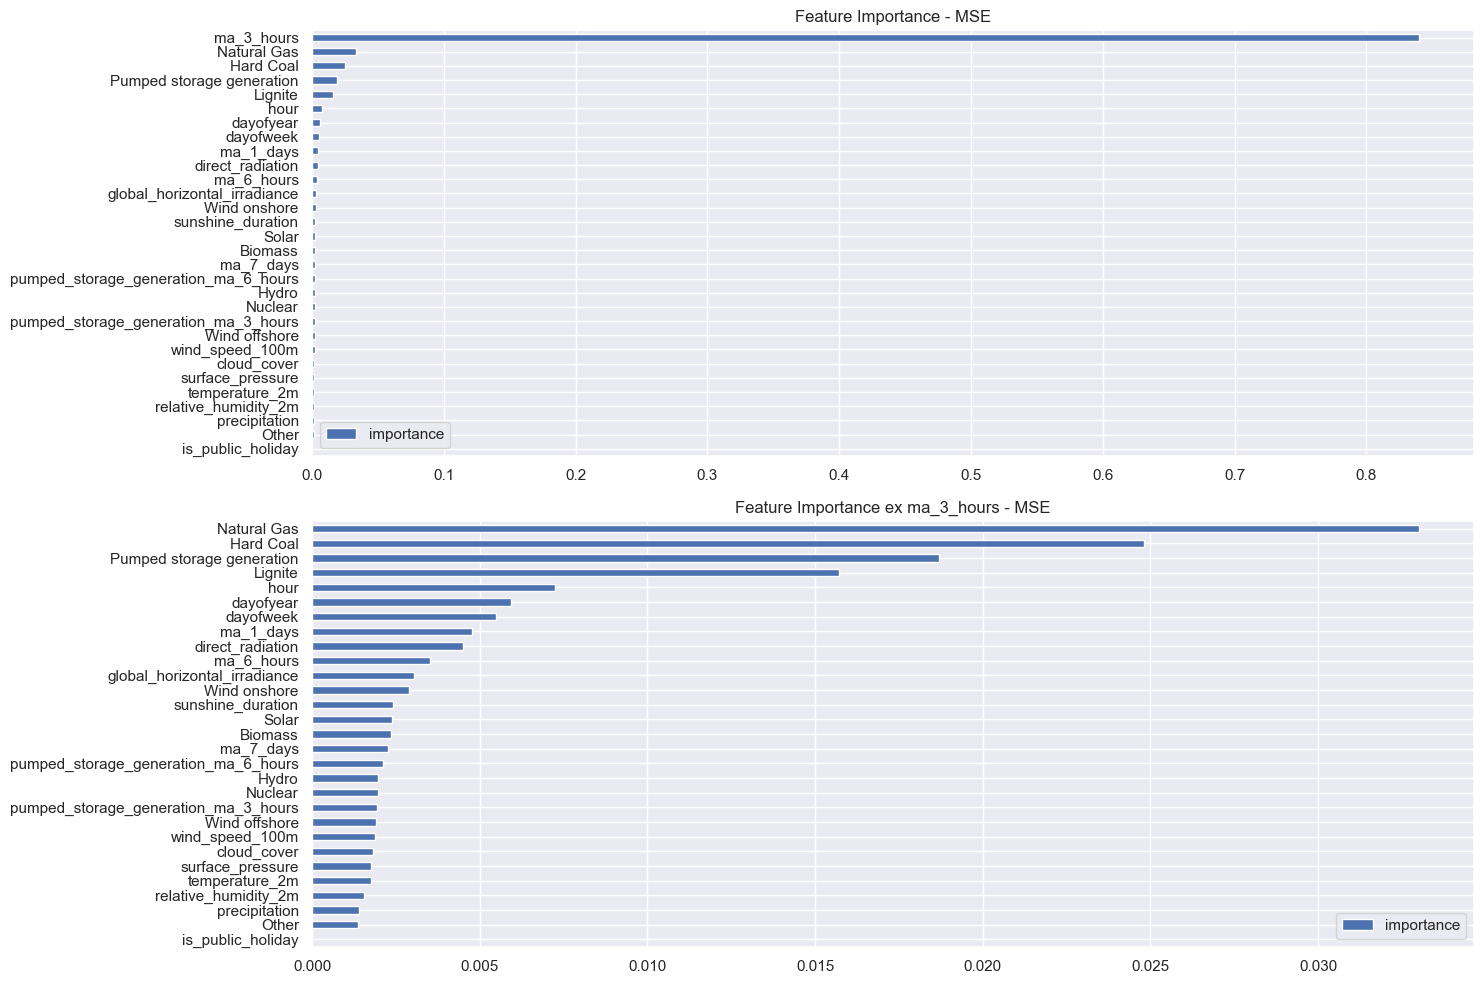

[0]	validation_0-mae:83.91491
[25]	validation_0-mae:25.97552
[50]	validation_0-mae:13.25784
[75]	validation_0-mae:12.77949
[100]	validation_0-mae:12.92222
[125]	validation_0-mae:12.89481
[149]	validation_0-mae:12.62349


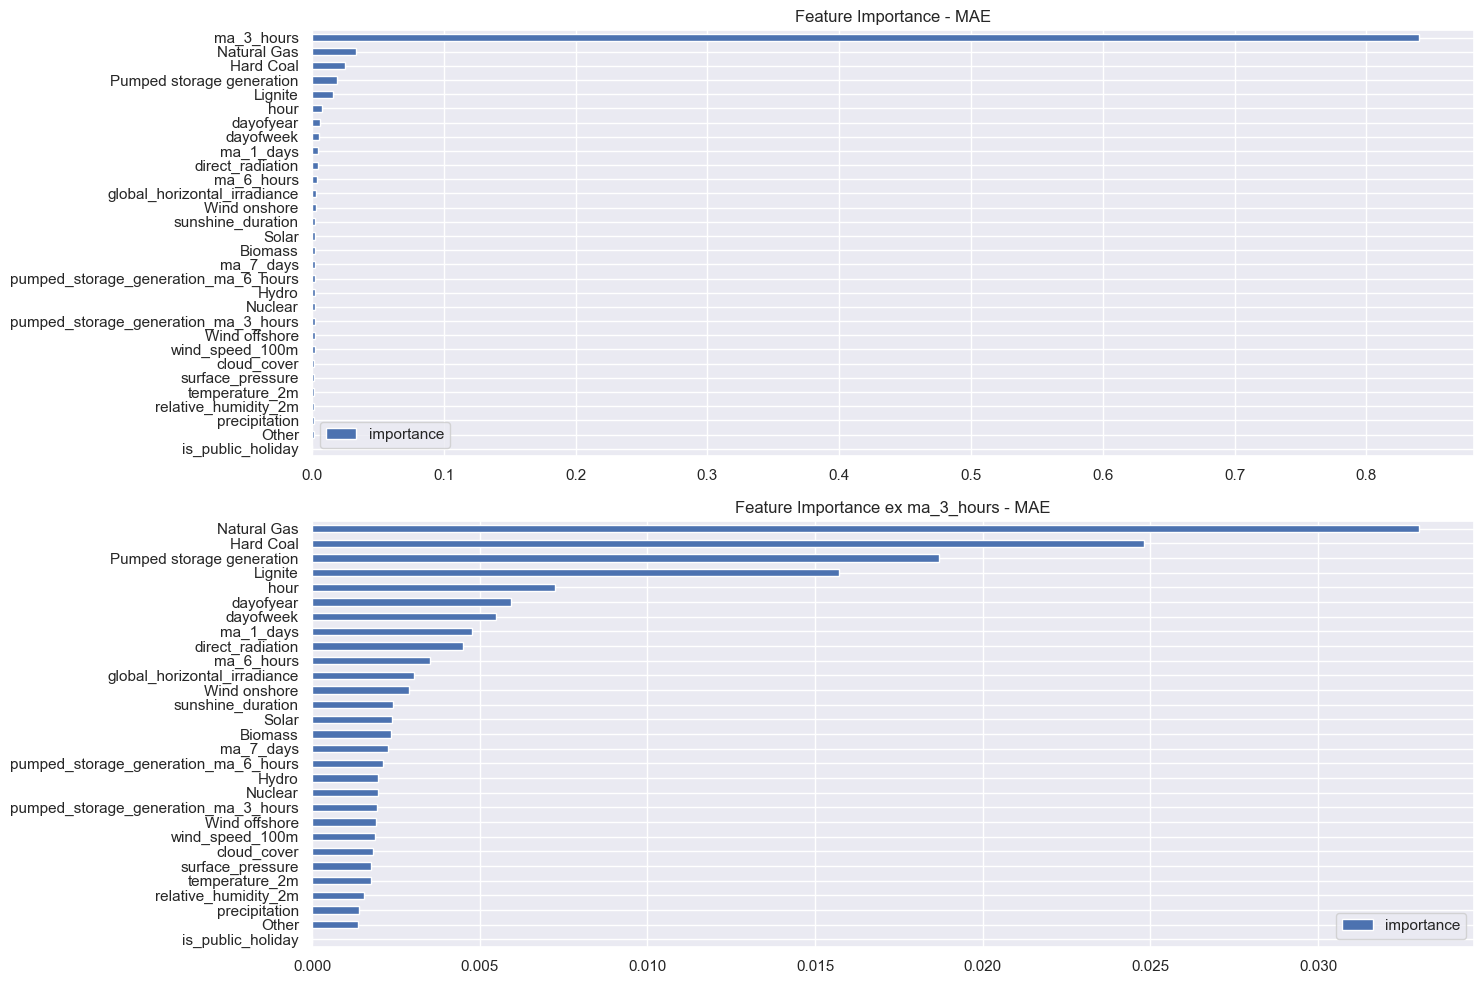

In [365]:
best_params = {
    "base_score": 0.380924762889507,
    "early_stopping_rounds": 215,
    "max_depth": 80,
    "learning_rate": 0.06,
    "n_estimators": 150,
    "gamma": 0.9,
    "min_child_weight": 6,
    "subsample": 0.5719023844219375,
    "colsample_bytree": 0.8815691043681952,
}
y_predicted_mse, model_mse, fi_img_mse = predict_return_mse(best_params, X_train, y_train, X_val, y_val, X_test)
y_predicted_mae, model_mae, fi_img_mae = predict_return_mae(best_params, X_train, y_train, X_val, y_val, X_test)

ValueError: x and y must have same first dimension, but have shapes (0,) and (24,)

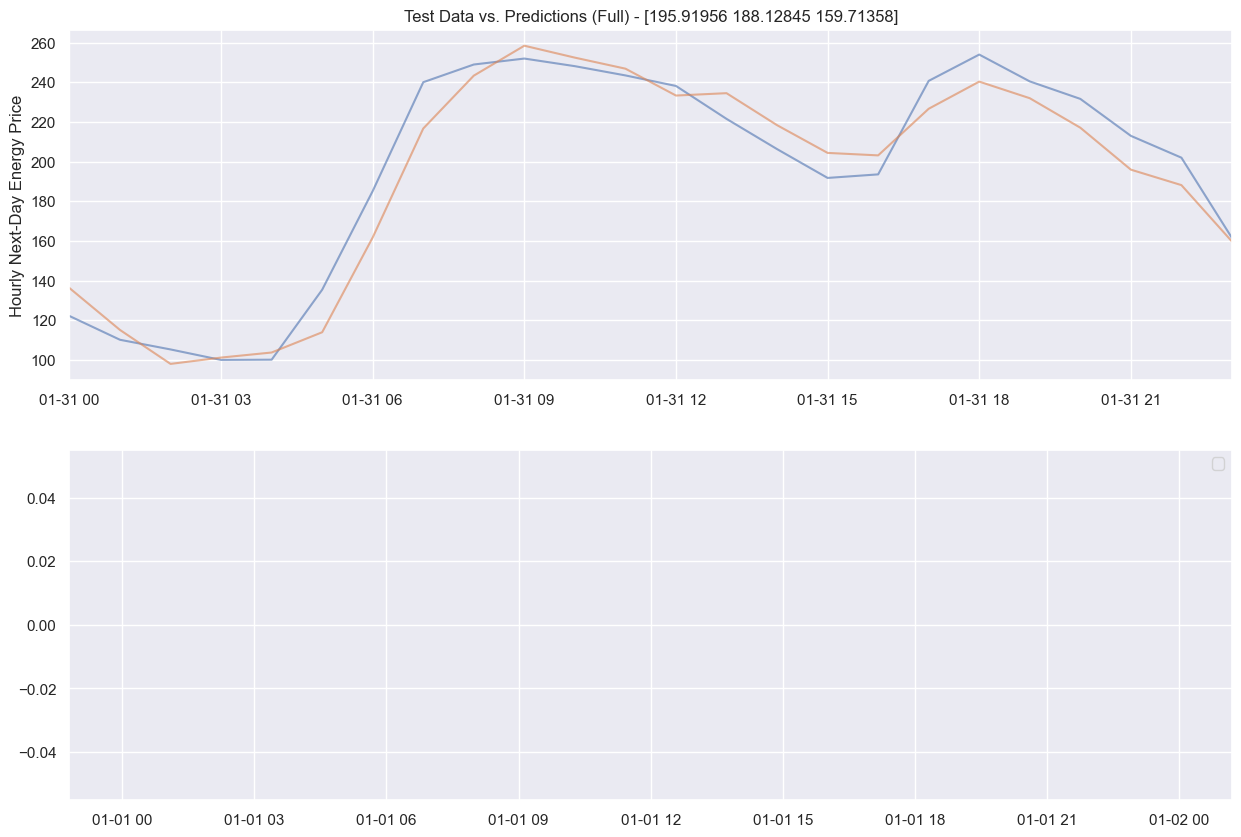

In [366]:
for objective in [y_predicted_mse,y_predicted_mae]:
    plot_predicted(test, objective)

buf = io.BytesIO()
plt.savefig(buf, format='png')
plt.show()
plt.close()
buf.seek(0)

ts_image = Image.open(buf)

In [354]:
ts = datetime.now().strftime("%Y%m%d_%H%M%S")
output_dir = f'./pickle/model_{score: .7g}_rmse_{ts}'
os.makedirs(output_dir, exist_ok=True)

model_dump_path = os.path.join(output_dir, "model.pickle")
with open(model_dump_path, "wb") as file:
    pickle.dump(reg_mse, file)
hp_path = os.path.join(output_dir, "hyperparams.json")
with open(hp_path, "w") as file:
    best_params_native = {k: (int(v) if isinstance(v, (np.integer, int)) else float(v) if isinstance(v, (np.floating, float)) else v) for k, v in best_params.items()}
    json.dump(best_params_native, file, indent=4)
output_filename = 'plot_image.png'
ts_chart_path = os.path.join(output_dir, output_filename)
ts_image.save(ts_chart_path)

output_filename = 'feature_importance.png'
fi_path = os.path.join(output_dir, output_filename)
feature_importance_image.save(fi_path)

NameError: name 'score' is not defined

In [ ]:
# if standardize:
#     y_test = actual_price_scaler.inverse_transform([y_test])
#     y_predicted = actual_price_scaler.inverse_transform([y_predicted])

#     y_test = y_test.flatten()
#     y_predicted = y_predicted.flatten()

# test["Price"] = y_test
# test["y_predicted"] = y_predicted

# score = root_mean_squared_error(test[["Price"]], test[["y_predicted"]])
# print(f'RMSE Score on Test set: {score:.6f}')

In [ ]:
# ts = datetime.now().strftime("%Y%m%d_%H%M%S")
# output_dir = f'./pickle/model_{score: .7g}_rmse_{ts}'
# os.makedirs(output_dir, exist_ok=True)

# model_dump_path = os.path.join(output_dir, "model.pickle")
# with open(model_dump_path, "wb") as file:
#     pickle.dump(reg_mse, file)
# hp_path = os.path.join(output_dir, "hyperparams.json")
# with open(hp_path, "w") as file:
#     best_params_native = {k: (int(v) if isinstance(v, (np.integer, int)) else float(v) if isinstance(v, (np.floating, float)) else v) for k, v in best_params.items()}
#     json.dump(best_params_native, file, indent=4)
# output_filename = 'plot_image.png'
# ts_chart_path = os.path.join(output_dir, output_filename)
# ts_image.save(ts_chart_path)

# output_filename = 'feature_importance.png'
# fi_path = os.path.join(output_dir, output_filename)
# feature_importance_image.save(fi_path)

In [ ]:
# Neurel Model not good -> data hungry, ressource intensive, not enough data -> overfitting, lack of edplainability